2024 May 30, updated

# Import and setting

In [1]:
# ---------- import
import pickle

import matplotlib.pyplot as plt
import numpy as np

In [2]:
rcParams_dict = {
    # ---------- figure
    'figure.figsize': [8, 6],
    'figure.dpi': 120,
    'figure.facecolor': 'white',
    # ---------- axes
    'axes.grid': True,
    'axes.linewidth': 1.5,
    # ---------- ticks
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.width': 1.0,
    'ytick.major.width': 1.0,
    'xtick.major.size': 8.0,
    'ytick.major.size': 8.0,
    # ---------- lines
    'lines.linewidth': 2.5,
    'lines.markersize': 12,
    # ---------- grid
    'grid.linestyle': ':',
    # ---------- font
    'font.family': 'Times New Roman',
    'mathtext.fontset': 'cm',
    #'mathtext.fontset': 'stix',
    'font.size': 20,
    'axes.labelsize': 26,
    'legend.fontsize': 26,
    'svg.fonttype': 'path',  # Embed characters as paths
    #'svg.fonttype': 'none',  # Assume fonts are installed on the machine
    'pdf.fonttype': 42,  # embed fonts in PDF using type42 (True type)
}

plt.rcParams.update(rcParams_dict)

# Data

In [3]:
def load_data(filename):
    if filename.endswith('.gz'):
        with gzip.open(filename, 'rb') as f:
            return pickle.load(f)
    else:
        with open(filename, 'rb') as f:
            return pickle.load(f)

In [14]:
rslt_data = load_data('./data/pkl_data/rslt_data.pkl')

# ---------- sort Selection
#rslt_data.head(10)

# ---------- sort by Energy
rslt_data.sort_values(by=['E_eV_atom']).head(10)

,Gen,Spg_num,Spg_sym,Spg_num_opt,Spg_sym_opt,E_eV_atom,Magmom,Opt
25,3,1,P1,1,P1,-28.312735,NaN,None
28,3,2,P-1,2,P-1,-27.982784,NaN,None
26,3,156,P3m1,156,P3m1,-27.332832,NaN,None
1,1,164,P-3m1,164,P-3m1,-27.281274,NaN,None
23,3,1,P1,12,C2/m,-27.280723,NaN,None
20,3,1,P1,1,P1,-27.241576,NaN,None
21,3,1,P1,1,P1,-26.705268,NaN,None
30,4,1,P1,1,P1,-26.602083,NaN,None
24,3,1,P1,1,P1,-26.468469,NaN,None
39,4,81,P-4,111,P-42m,-26.286161,NaN,None


In [15]:
# ---------- Generation
gmax = rslt_data['Gen'].max()
print(f'Number of generation: {gmax}')

# ---------- Number of structures
ndata = len(rslt_data)
print(f'Number of data: {ndata}')

# ---------- check success and error
nsuccess = rslt_data['E_eV_atom'].count()
nerror = ndata - nsuccess
print(f'Success: {nsuccess}')
print(f'Error: {nerror}')

# ---------- minimum
Emin = rslt_data['E_eV_atom'].min()
print(f'Emin: {Emin} eV/atom')

Number of generation: 4
Number of data: 40
Success: 40
Error: 0
Emin: -28.312734932822 eV/atom


# Energy vs. trial

In [20]:
title = 'Evolutionary algorithm for Si$_{16}$'
dx = 1
xmin = 0
xmax = ndata + dx
ymin = -0.2
ymax = 20

Text(0, 0.5, 'Energy (eV/atom)')

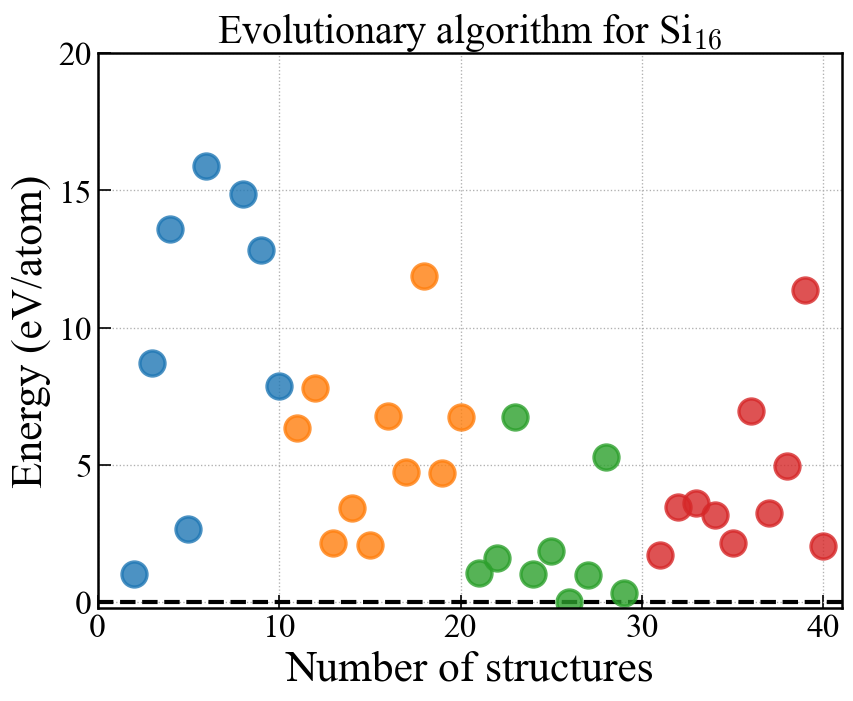

In [21]:
fig, ax = plt.subplots()

# ---------- axis
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

# ---------- hline at zero
ax.hlines(0.0, xmin, xmax, 'k', '--')

# ---------- plot
#ax.plot(rslt_data['E_eV_atom'] - Emin, 'o', ms=15, mew=2.0, alpha=0.8)


# ---------- color coded by generation
tx = 0
for g in range(1, gmax+1):    # generation starts from 1
    gfilter = rslt_data['Gen'] == g
    num = len(rslt_data[gfilter])
    x = np.arange(1, num+1) + tx
    ax.plot(x, rslt_data['E_eV_atom'][gfilter] - Emin, 'o', ms=15, mew=2.0, alpha=0.8)
    tx += num

# ---------- title and label
ax.set_title(title)
ax.set_xlabel('Number of structures')
ax.set_ylabel('Energy (eV/atom)')

In [ ]:
filename = 'Si16_EA.png'
#filename = 'Si16_EA.pdf'

In [ ]:
# ---------- save figure
fig.savefig(filename, bbox_inches='tight')    # PNG, PDF
#fig.savefig(filename, bbox_inches='tight', dpi=300)    # high dpi PNG